# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, 
                             precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay,
                             roc_curve, auc, RocCurveDisplay)

## Binary Classification with Logistic Regression

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot: xlabel='test_result', ylabel='count'>

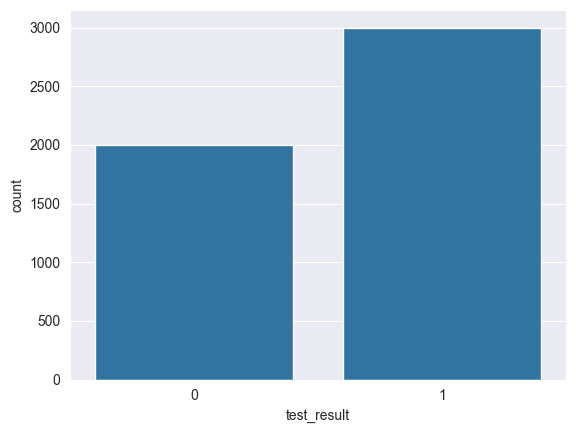

In [6]:
sns.countplot(df, x='test_result')

<AxesSubplot: xlabel='test_result', ylabel='age'>

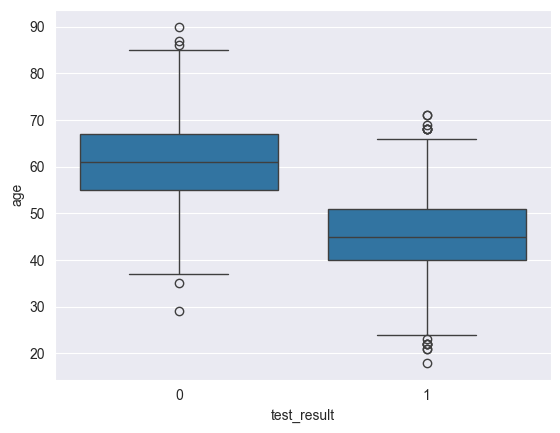

In [7]:
sns.boxplot(df, x='test_result', y='age')

<AxesSubplot: xlabel='test_result', ylabel='physical_score'>

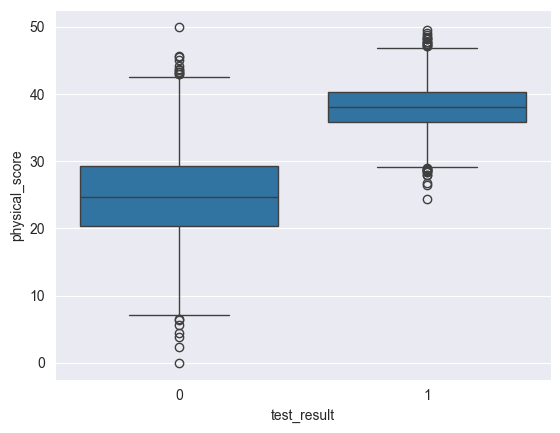

In [8]:
sns.boxplot(df, x='test_result', y='physical_score')

<AxesSubplot: xlabel='age', ylabel='physical_score'>

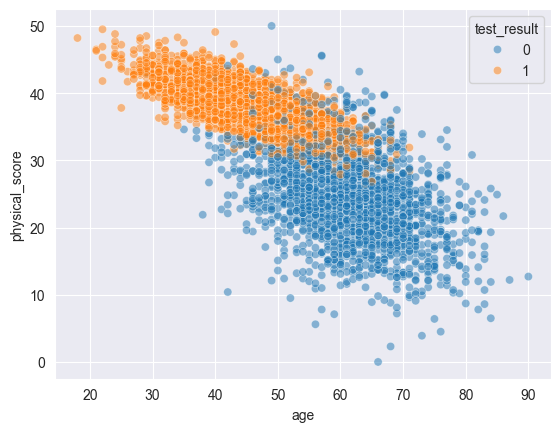

In [9]:
sns.scatterplot(df, x='age', y='physical_score', hue='test_result', alpha=0.5)

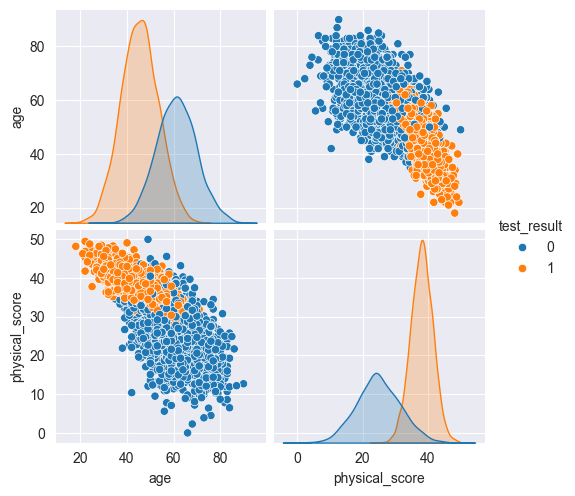

In [10]:
sns.pairplot(df, hue='test_result')

<AxesSubplot: >

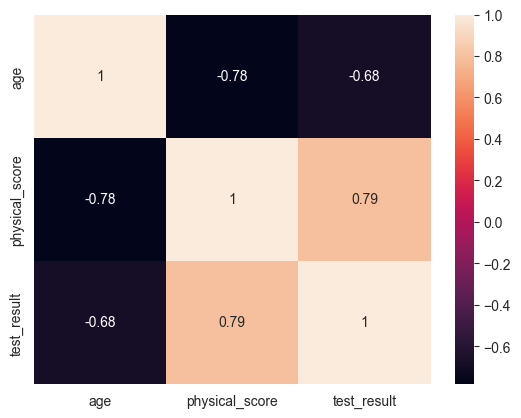

In [11]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='physical_score', ylabel='test_result'>

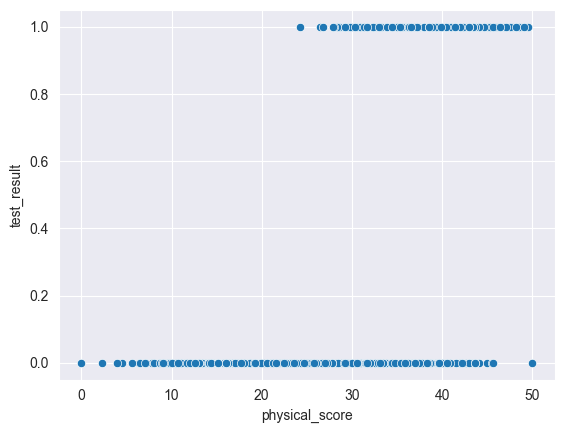

In [12]:
sns.scatterplot(df, x='physical_score', y='test_result')

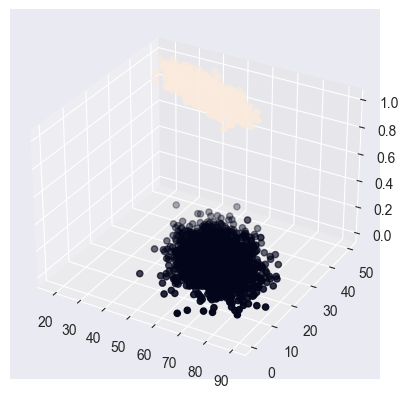

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [14]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [19]:
model.coef_

array([[-0.95017725,  3.46148946]])

In [20]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [21]:
y_pred = model.predict(scaled_X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.93

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[172,  21],
       [ 14, 293]])

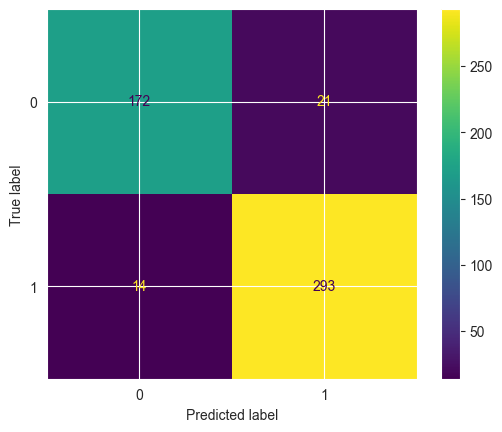

In [24]:
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

disp.plot()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [26]:
precision_score(y_test, y_pred)

0.9331210191082803

In [27]:
recall_score(y_test, y_pred)

0.9543973941368078

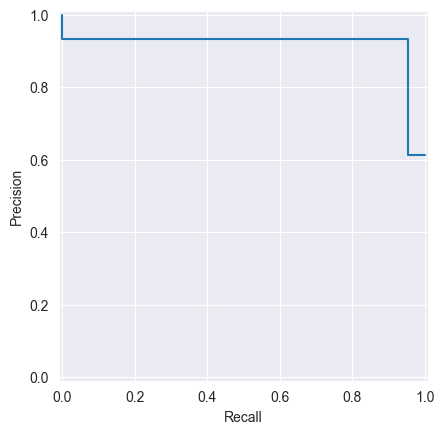

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

pr_disp = PrecisionRecallDisplay(precision, recall)

pr_disp.plot()

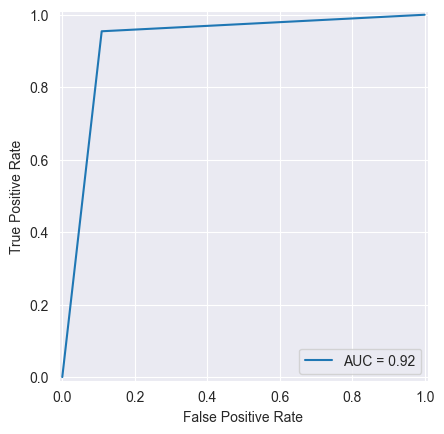

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

roc_disp.plot()

## Multi-Class Classification with Logistic Regression

In [30]:
df = pd.read_csv('iris.csv')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot: xlabel='species', ylabel='count'>

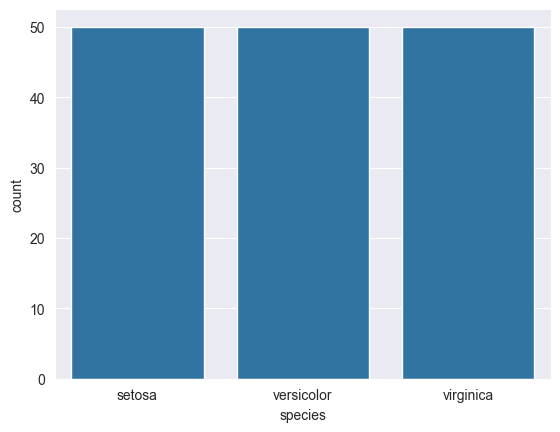

In [35]:
sns.countplot(df, x='species')

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

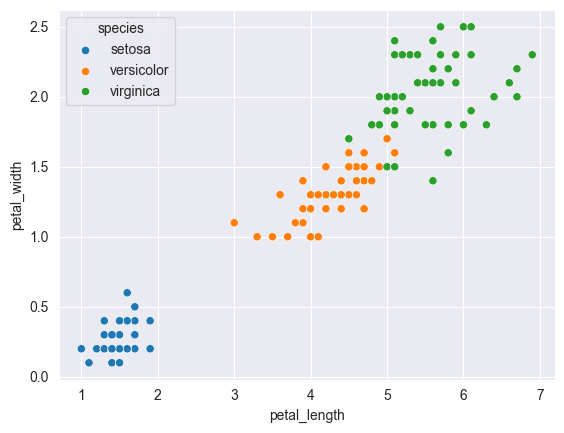

In [36]:
sns.scatterplot(df, x='petal_length', y='petal_width', hue='species')

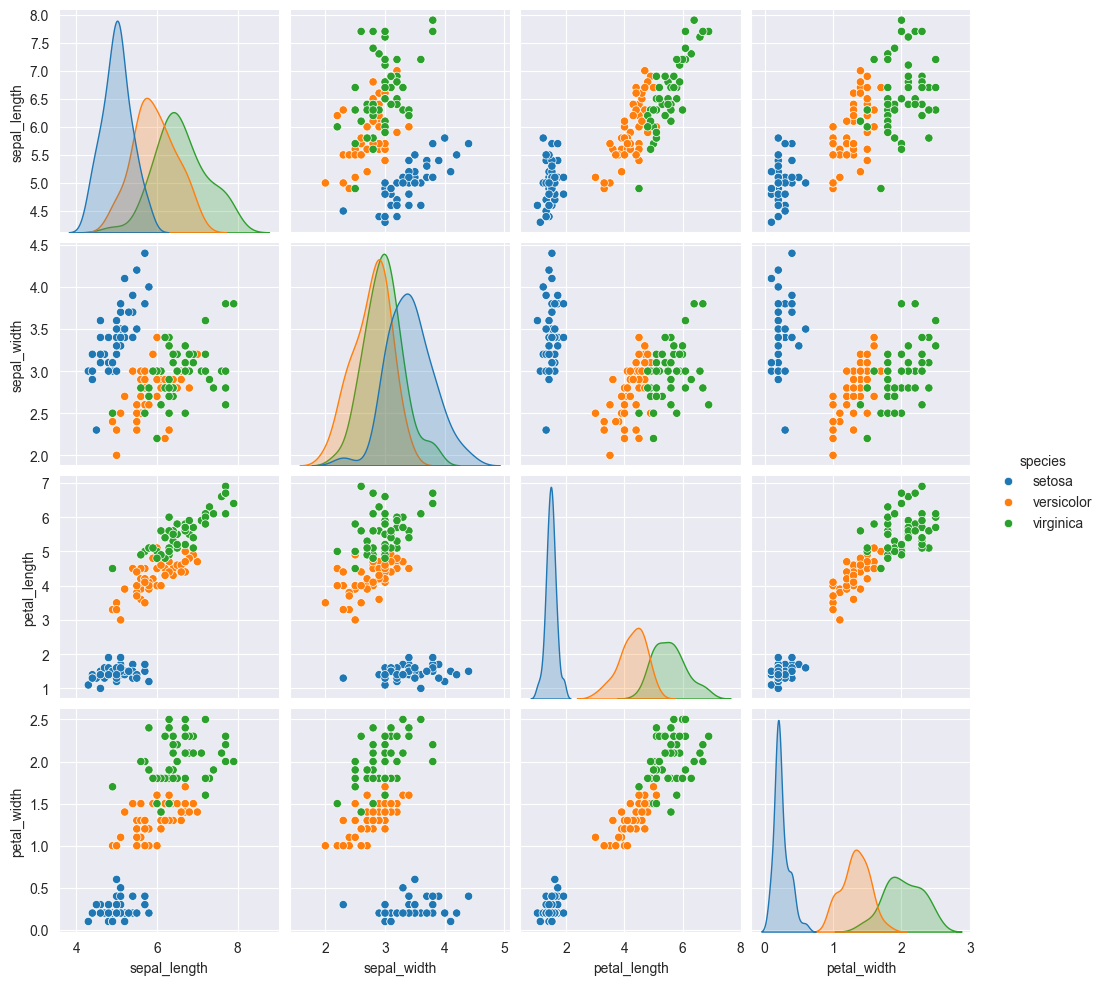

In [37]:
sns.pairplot(df, hue='species')

<AxesSubplot: >

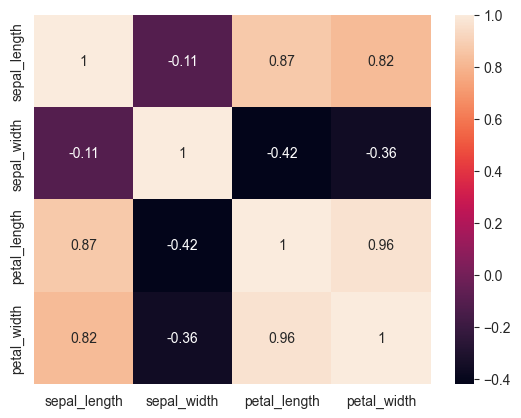

In [38]:
sns.heatmap(df.drop('species', axis=1).corr(), annot=True)

In [39]:
X = df.drop('species', axis=1)
y = df['species']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [41]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
model = LogisticRegression(solver='saga', max_iter=5000)

In [43]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 10, 20)
}

In [44]:
grid_model = GridSearchCV(model, param_grid)

In [45]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [46]:
grid_model.best_params_

{'C': 37.926901907322495, 'penalty': 'l2'}

In [47]:
y_pred = grid_model.predict(scaled_X_test)

In [48]:
accuracy_score(y_test, y_pred)

1.0

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]])

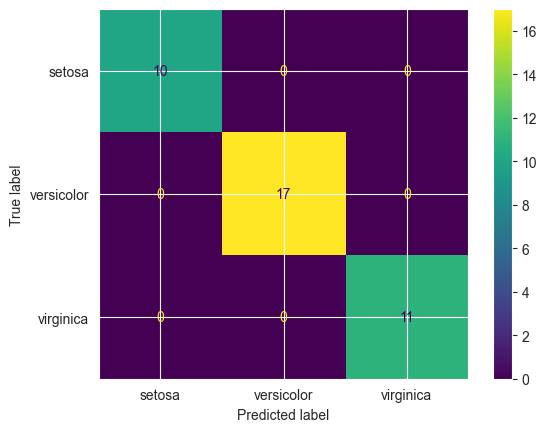

In [50]:
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model.classes_)

disp.plot()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Exercises

In [52]:
df = pd.read_csv('heart.csv')

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot: xlabel='target', ylabel='count'>

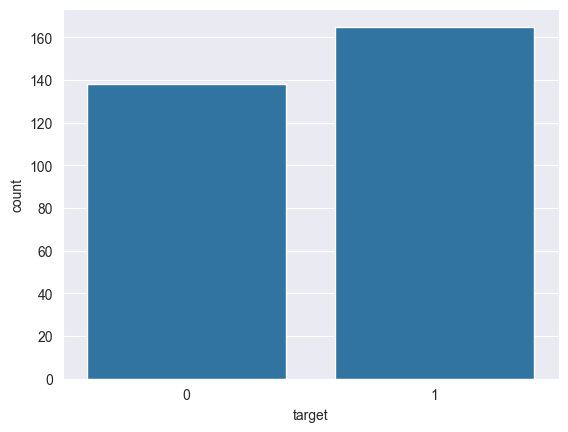

In [57]:
sns.countplot(df, x='target')

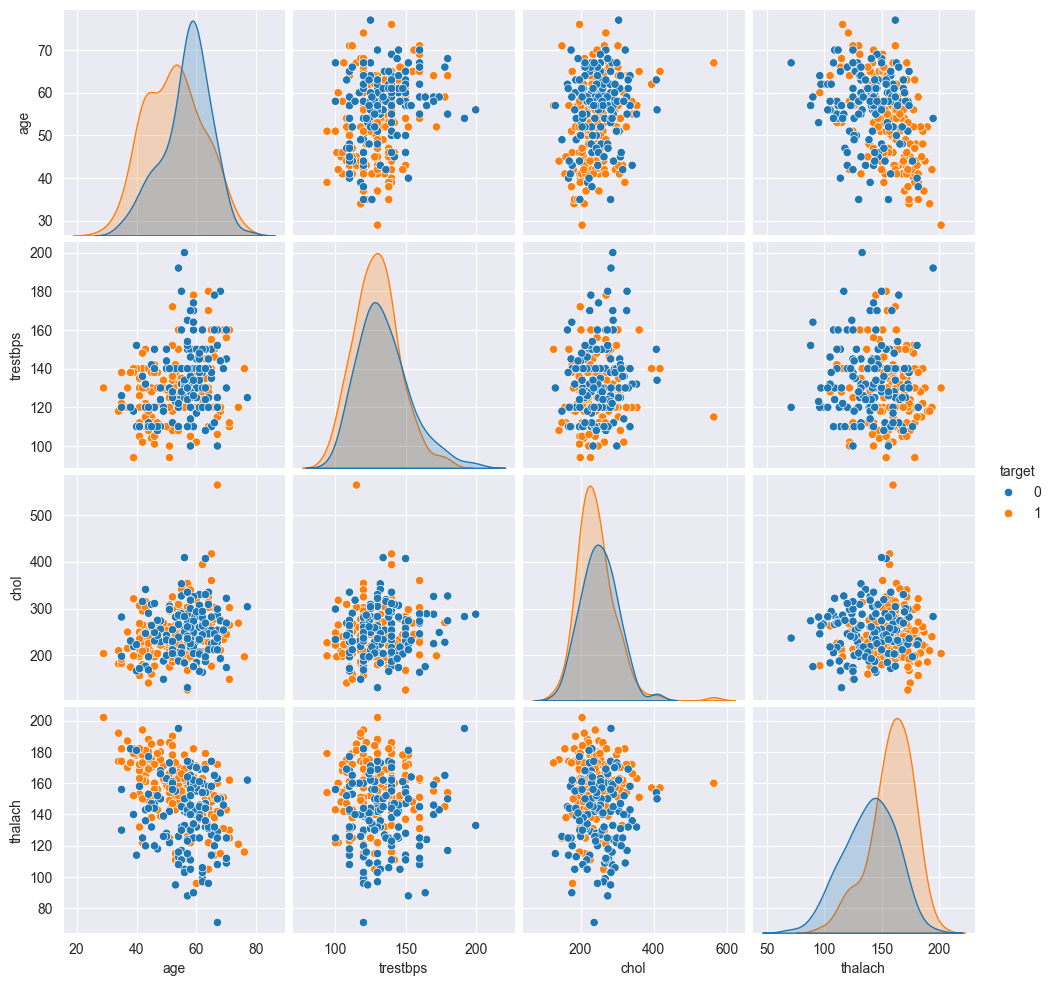

In [58]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

<AxesSubplot: >

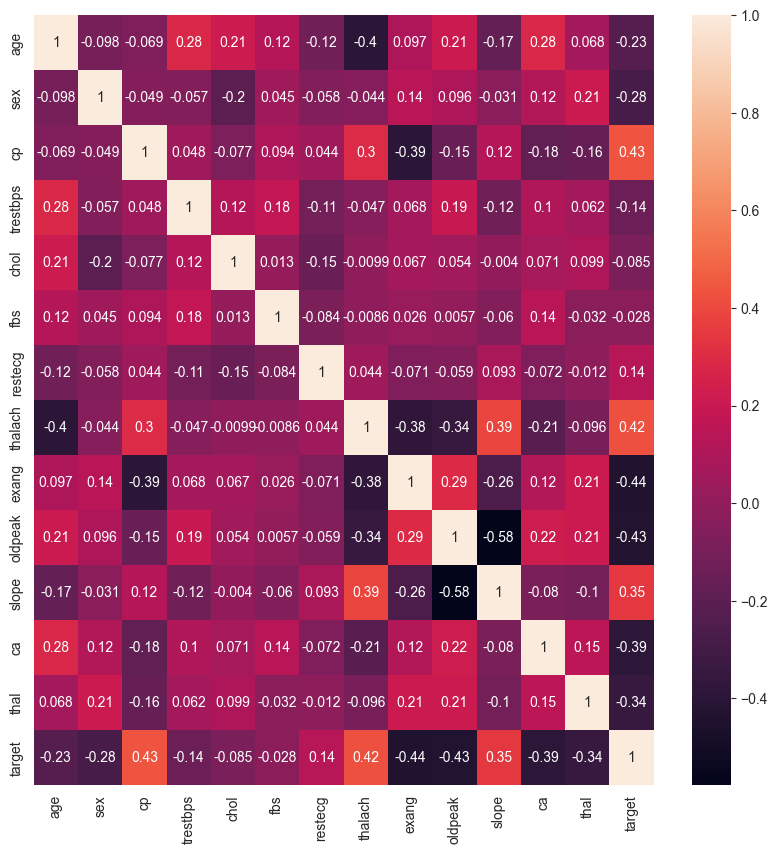

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [60]:
X = df.drop('target', axis=1)
y = df['target']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [63]:
model = LogisticRegression(max_iter=5000)

param_grid = {
    'C': np.logspace(0, 10, 20)
}

grid_model = GridSearchCV(model, param_grid)

grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10])})

In [64]:
model = LogisticRegressionCV()

model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [65]:
model.C_

array([0.04641589])

In [66]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [67]:
parameters = model.coef_
parameters

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [68]:
parameters = pd.Series(parameters[0], X.columns)
parameters

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
fbs         0.024956
restecg     0.080830
thalach     0.298969
exang      -0.334400
oldpeak    -0.352528
slope       0.251001
ca         -0.497326
thal       -0.374410
dtype: float64

<AxesSubplot: >

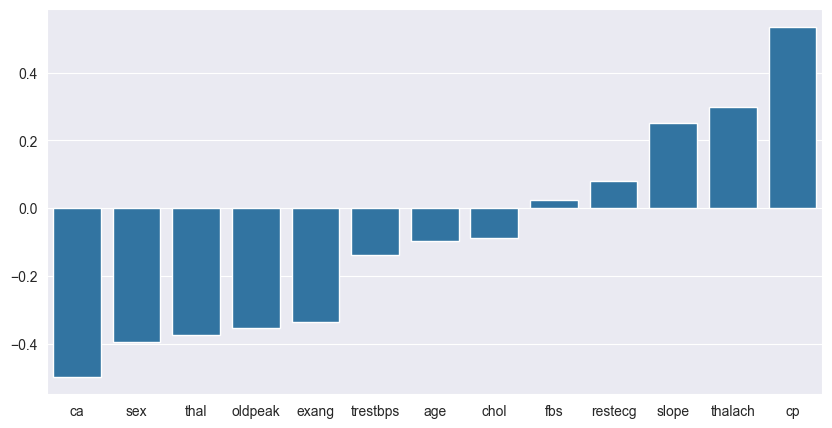

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(parameters.sort_values())

In [70]:
y_pred = model.predict(scaled_X_test)

In [71]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  3],
       [ 2, 14]])

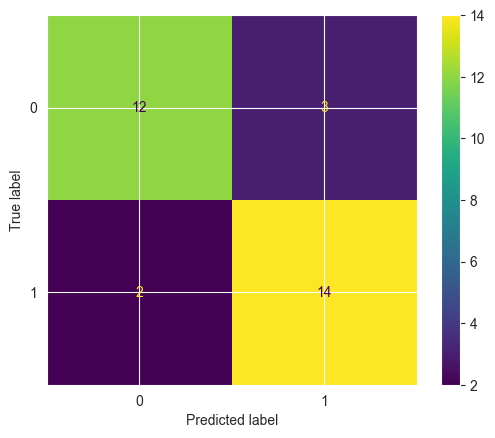

In [72]:
cm_disp = ConfusionMatrixDisplay(cm)

cm_disp.plot()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



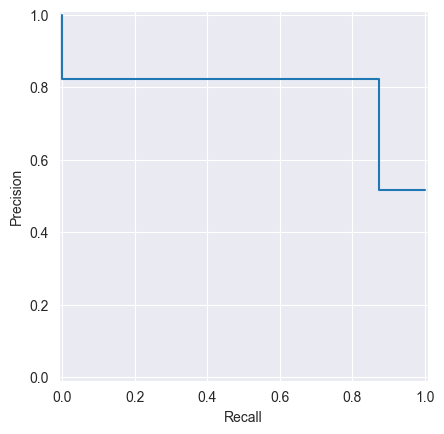

In [74]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

pr_disp = PrecisionRecallDisplay(precision, recall)

pr_disp.plot()

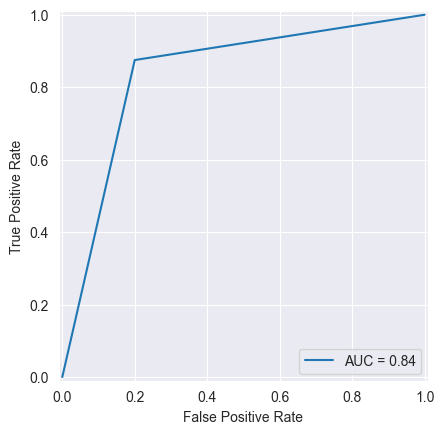

In [75]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

roc_disp.plot()

In [76]:
patient = [[54., 1., 0., 122., 286, 0., 0., 116., 1., 3.2, 1., 2., 2.]]

In [77]:
grid_model.predict(patient)

array([0])

In [78]:
grid_model.predict_proba(patient)

array([[1.00000000e+00, 5.64525297e-25]])